In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from data_loader import PybulletNpyDataset

In [3]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.models import resnet18, resnet34, resnet50

In [25]:
resnet = resnet18
model_path = 'data/classification/model_29.pth'
data_path = '/ssd/disk/ur5_tidying_data/pybullet_line/test'
device = "cuda:0"

dataset = PybulletNpyDataset(data_dir=data_path)
dataset.fsize = 200
dataloader = DataLoader(dataset, batch_size=16, shuffle=False, num_workers=1)

model = resnet(pretrained=False)
fc_in_features = model.fc.in_features

model.fc = nn.Sequential(
    nn.Linear(fc_in_features, 1),
    nn.Sigmoid()
)
model.load_state_dict(torch.load(model_path))
model.to(device)
model.eval()

preprocess = transforms.Compose([
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

Score > 0.8


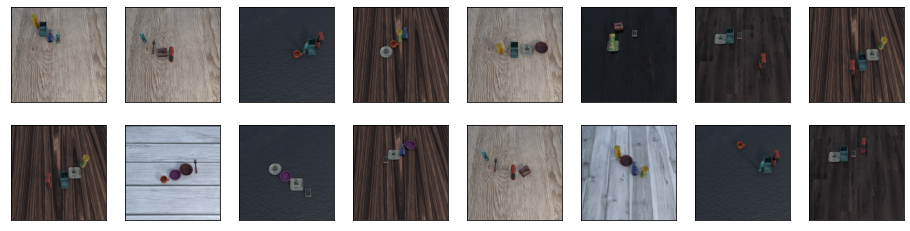

Score < 0.3


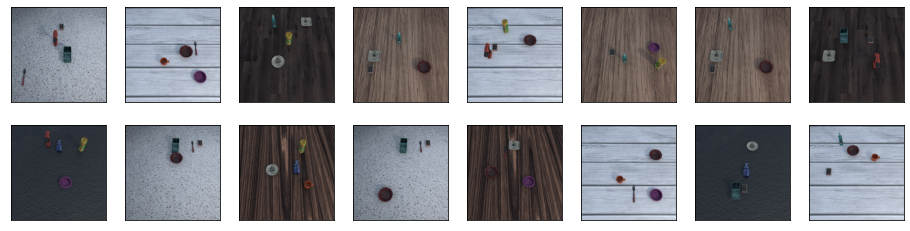

In [46]:
scene_over_08 = []
scene_under_03 = []

dataloader = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=1)

count = 0
for X_val, Y_val in dataloader:
    x_raw = X_val.cpu().numpy().transpose([0, 2, 3, 1])
    X_val = preprocess(X_val).to(device)
    Y_val = Y_val[:, 0].to(device)
    y_pred = model(X_val)[:, 0].detach().cpu().numpy()
    
    scene_over_08.append(x_raw[y_pred>0.8])
    scene_under_03.append(x_raw[y_pred<0.3])
    count += 1
    
scene_over_08 = np.concatenate(scene_over_08, axis=0)
scene_under_03 = np.concatenate(scene_under_03, axis=0)

print("Score > 0.8")
fig = plt.figure(figsize=(16, 4))
for i in range(16):
    ax = fig.add_subplot(2, 8, i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(scene_over_08[i])
plt.show()

print("Score < 0.3")
fig = plt.figure(figsize=(16, 4))
for i in range(16):
    ax = fig.add_subplot(2, 8, i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(scene_under_03[i])
plt.show()

Score: 0.6455786


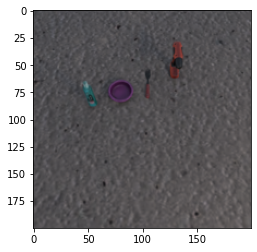

Score: 0.42759377


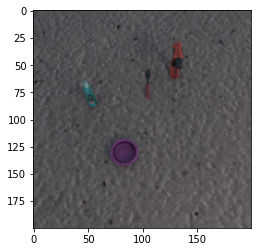

Score: 0.50990635


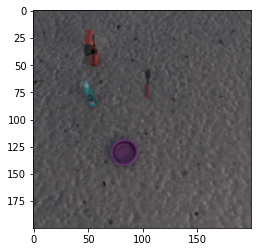

Score: 0.45409498


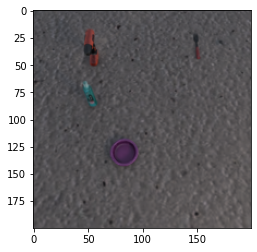

Score: 0.8061451


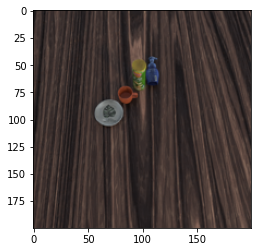

Score: 0.32412952


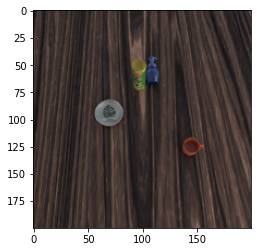

Score: 0.34265313


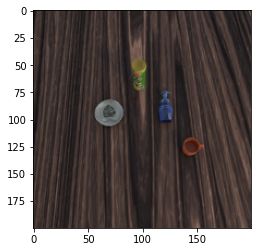

Score: 0.22454467


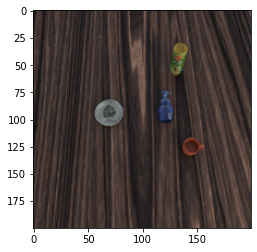

Score: 0.8546839


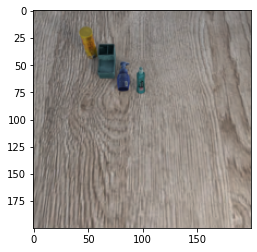

Score: 0.66195536


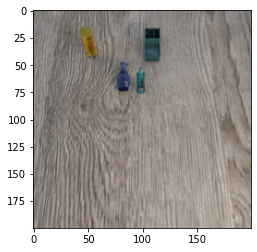

Score: 0.68927866


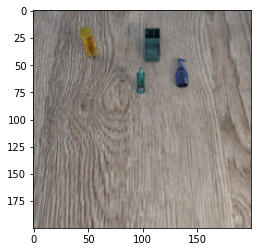

Score: 0.5899783


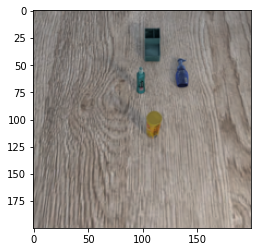

Score: 0.8980216


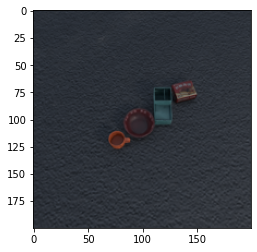

Score: 0.4018161


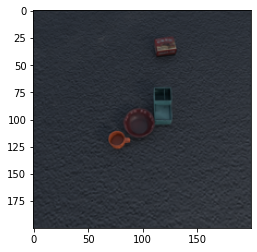

Score: 0.16590899


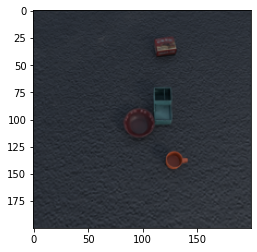

Score: 0.45835024


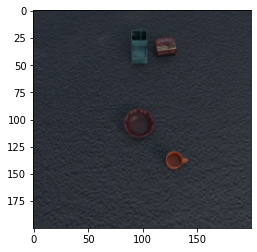

Score: 0.55210114


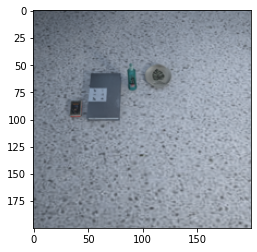

Score: 0.40554526


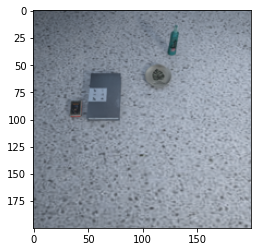

Score: 0.37523735


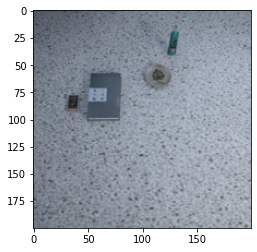

Score: 0.3873593


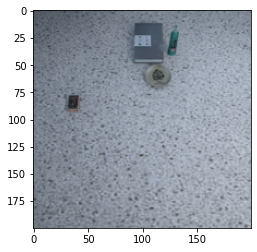

Score: 0.871456


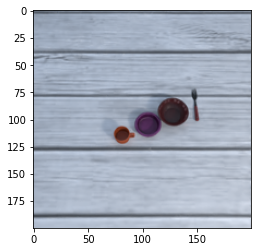

Score: 0.29156378


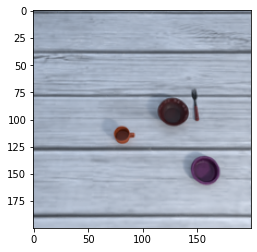

Score: 0.26776257


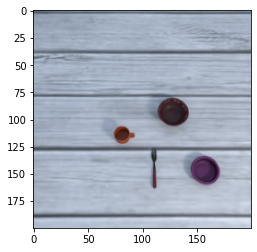

Score: 0.11434708


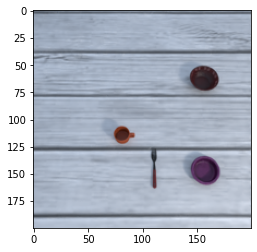

Score: 0.73657984


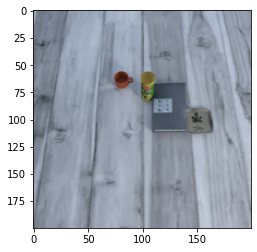

Score: 0.5068387


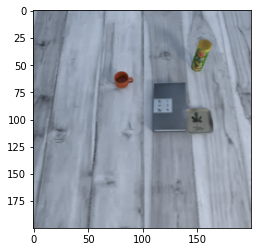

Score: 0.6053339


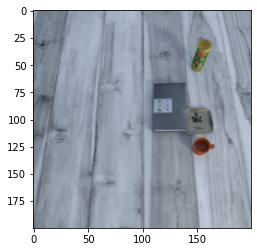

Score: 0.40994224


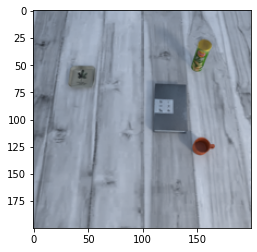

Score: 0.83966064


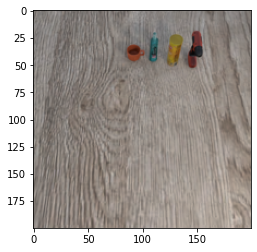

Score: 0.7349883


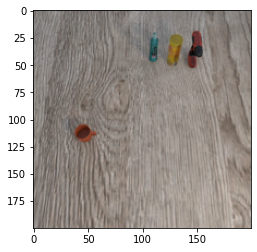

Score: 0.8442985


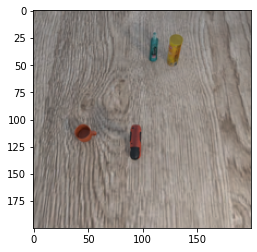

Score: 0.7507782


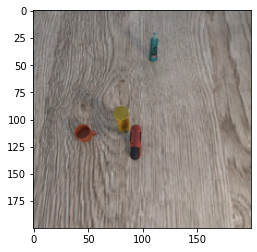

Score: 0.7600373


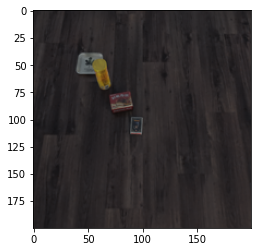

Score: 0.7211939


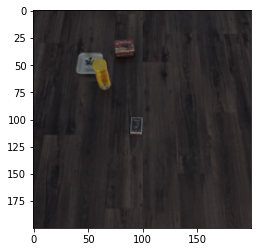

Score: 0.5025098


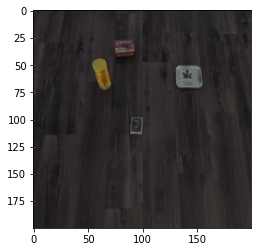

Score: 0.6559174


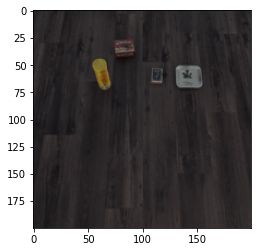

Score: 0.8671569


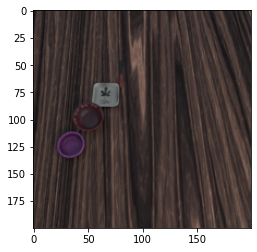

Score: 0.51855755


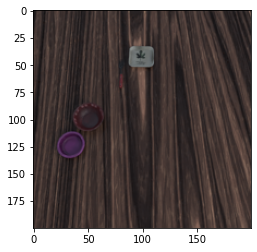

Score: 0.2872137


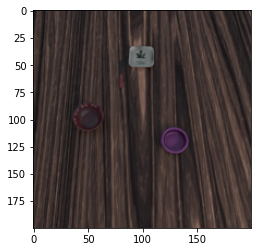

Score: 0.7032617


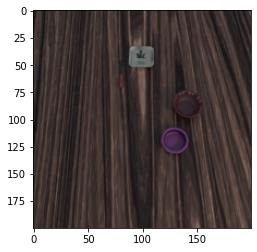

Score: 0.505213


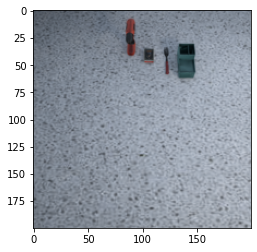

Score: 0.22481894


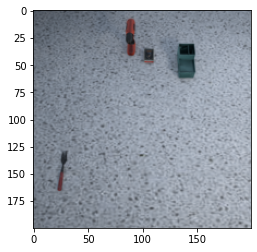

Score: 0.192639


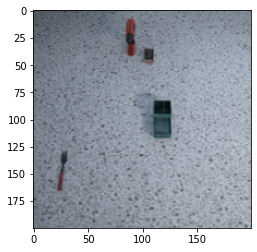

Score: 0.19143268


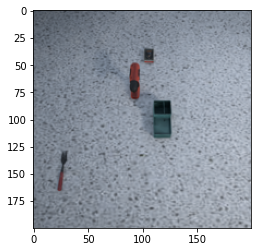

Score: 0.8167583


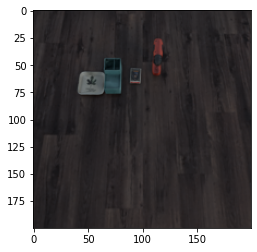

Score: 0.8370015


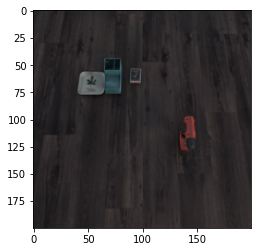

Score: 0.560932


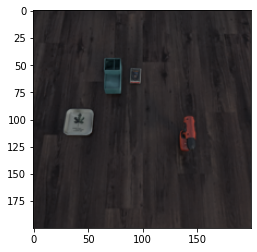

Score: 0.28904212


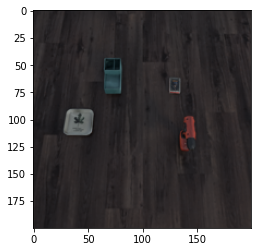

In [13]:
count = 0
for X_val, Y_val in dataloader:
    x_raw = X_val.cpu().numpy().transpose([0, 2, 3, 1])
    X_val = preprocess(X_val).to(device)
    Y_val = Y_val[:, 0].to(device)
    y_pred = model(X_val)[:, 0].detach().cpu().numpy()
    
    for i in range(12):
        print("Score:", y_pred[i])
        plt.imshow(x_raw[i])
        plt.show()
    count += 1
    if count > 3:
        break